In [381]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.signal import unit_impulse,fftconvolve
from numpy.lib.scimath import sqrt as csqrt

In [469]:
def x(n):
    x_n = np.cos(2*np.pi*n/20)
    return x_n

In [470]:
def DFT(N, x_n):
    j = csqrt(-1)
    W = np.zeros((N, N), dtype=complex) ##creating the Matrix Transformation
    for i in range(N):
        for k in range(N):
            omega = np.exp(-2*np.pi*j/N)
            W[i][k] = np.power(omega, i*k)
    
    dft = np.matmul(W, np.row_stack(x_n))
    return dft

Text(0, 0.5, 'PHASE')

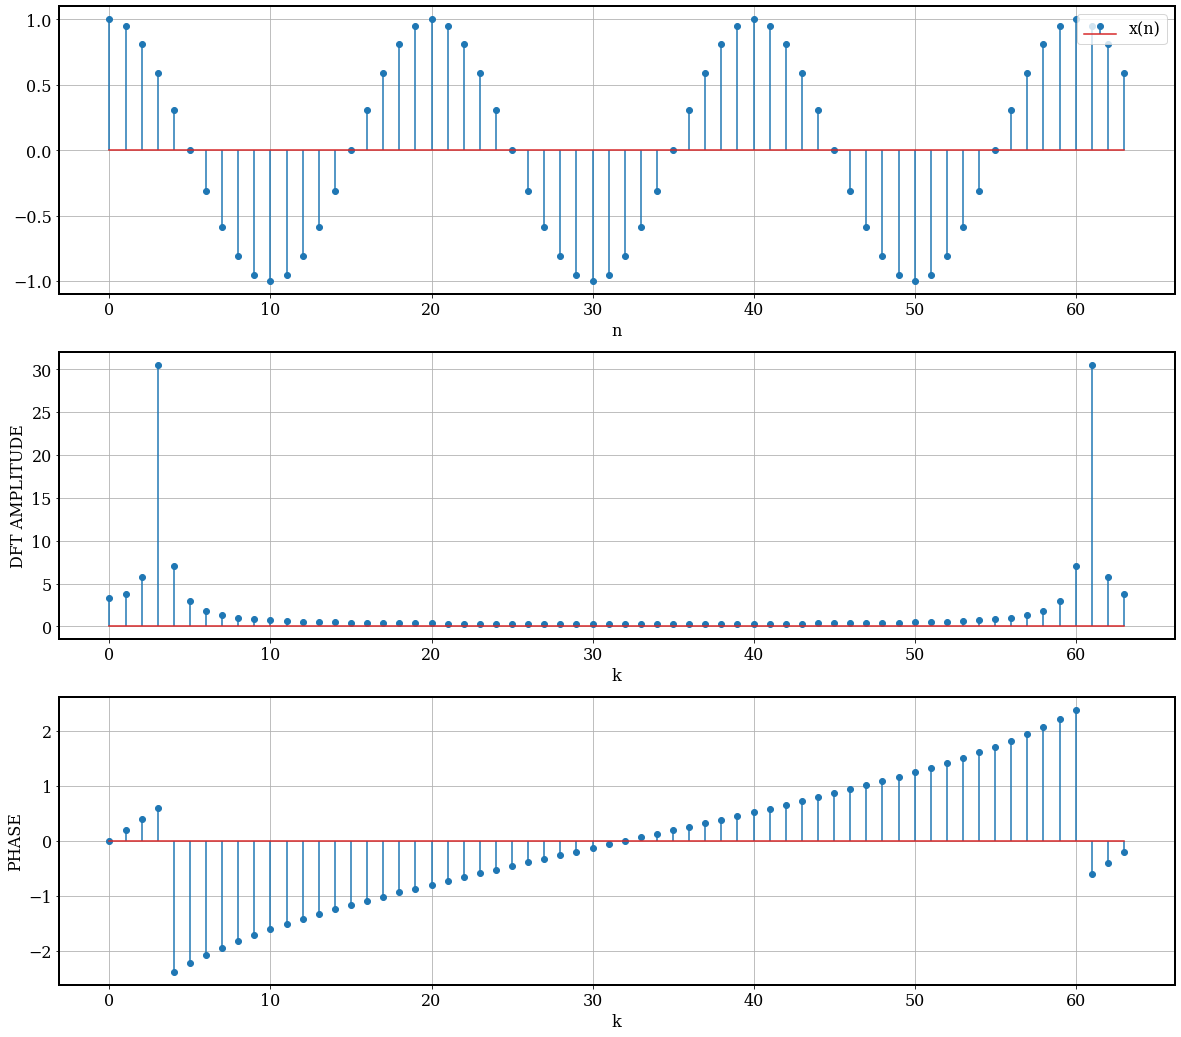

In [471]:
T = 20 #period of the cosine
N = 64
#t = np.linspace(0, 5*T, 10000)
n = np.arange(0, N)
k = np.arange(0, N)

dft = DFT(N, x(n))
phase = np.angle(dft)

figure, ax = plt.subplots(3,1,figsize=(20,18))
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('axes', linewidth=2)
plt.rc('font', **font)

ax[0].stem(n, x(n),label = 'x(n)') ## sinal amostrado
#ax[0].plot(1000*t, x(t),'--',label = 'x(t)', color = 'Black')
ax[0].grid(True)
ax[0].set_xlabel('n')
ax[0].legend(loc = 'upper right')

ax[1].stem(k, abs(dft))
ax[1].grid(True)
ax[1].set_xlabel('k')
ax[1].set_ylabel('DFT AMPLITUDE')

ax[2].stem(k, phase)
ax[2].grid(True)
ax[2].set_xlabel('k')
ax[2].set_ylabel('PHASE')


# REFERENCE

https://en.wikipedia.org/wiki/DFT_matrix